# Trabajo Práctico Número 1: Organización de Datos.

## Alumnos: 

### Melanie Mombrú - 103882
### Federico Penic - 102501
### Juan Ignacio Díaz - 103488
### Alejandro Nicolás Smith - 101730 

En este trabajo práctico nos centraremos en varias preguntas interesantes acerca de los datos en cuestión, desarrollando cada una de ellas en forma detallada.  

#### Importación de Librerías y Lectura de Datos

In [ ]:
#@title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default')

sns.set(style="whitegrid") 

pd.options.display.float_format = '{:20,.2f}'.format

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#@title
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
#@title
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#@title
id='14mvxS2B5shP6vhj5PH3TUIJyKXpkTQE5'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('damage_grade.csv')

In [ ]:
#@title
id='19GD88RuFRVAUYD99V2vQrhY2nhhmgL29'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('features.csv')

In [ ]:
#@title
damage_grade = pd.read_csv('damage_grade.csv', dtype={'building_id':'int32','damage_grade':'int8'})
damage_grade.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [ ]:
features = pd.read_csv('features.csv',dtype={'building_id':'int32',
                                             'geo_level_1_id':'int8',
                                             'geo_level_2_id':'int16',
                                             'geo_level_3_id':'int16',
                                             'count_floors_pre_eq':'int8',
                                             'age':'int16',
                                             'area_percentage':'int8',
                                             'height_percentage':'int8',
                                             'land_surface_condition':'category',
                                             'foundation_type':'category',
                                             'roof_type':'category',
                                             'ground_floor_type':'category',
                                             'other_floor_type':'category',
                                             'position':'category',
                                             'plan_configuration':'category',
                                             'has_superstructure_adobe_mud':'int8',
                                             'has_superstructure_mud_mortar_stone':'int8',
                                             'has_superstructure_stone_flag':'int8',
                                             'has_superstructure_cement_mortar_stone':'int8',
                                             'has_superstructure_mud_mortar_brick':'int8',
                                             'has_superstructure_cement_mortar_brick':'int8',
                                             'has_superstructure_timber':'int8',
                                             'has_superstructure_bamboo':'int8',
                                             'has_superstructure_rc_non_engineered':'int8',
                                             'has_superstructure_rc_engineered':'int8',
                                             'has_superstructure_other':'int8',
                                             'legal_ownership_status':'category',
                                             'count_families':'int8',
                                             'has_secondary_use':'int8',
                                             'has_secondary_use_agriculture':'int8',
                                             'has_secondary_use_hotel':'int8',
                                             'has_secondary_use_rental':'int8',
                                             'has_secondary_use_institution':'int8',
                                             'has_secondary_use_school':'int8',
                                             'has_secondary_use_industry':'int8',
                                             'has_secondary_use_health_post':'int8',
                                             'has_secondary_use_gov_office':'int8',
                                             'has_secondary_use_use_police':'int8',
                                             'has_secondary_use_other':'int8'})
features.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


# ¿Existe una relación entre el grado de daño de la edificación y el material con el que fue construída?

Los diferentes edificios y establecimientos de Nepal, como en cualquier lugar del planeta, presentan diferentes materiales de construcción. Los más utilizados en este sector del mundo son los siguientes: 

$1)$ Adobe/Barro. 

$2)$ Piedra/Barro.

$3)$ Piedra.

$4)$ Cemento/Piedra.

$5)$ Ladrillos/Barro.

$6)$ Cemento/Ladrillos.

$7)$ Timber (Madera específica para la construcción).

$8)$ Bambú (Caña).

$9)$ Concreto Reforzado No-Diseñado.

$10)$ Concreto Reforzado Diseñado.

A priori, uno tendería a creer que las construcciones realizadas con materiales más rudimentarios (Por ejemplo Adobe o Bambú) fueron aquellas que sufrieron mayores daños a consecuencia del Terremoto Gorkha. Sin embargo, ¿Qué nos dicen los datos concretos acerca de esta situación?

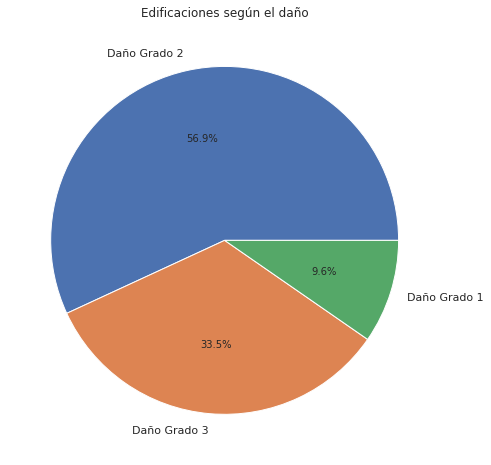

In [ ]:
#@title Gráfico
cantidadConstrucciones = (int)(damage_grade.loc[:,['building_id']].drop_duplicates().count())

#print(cantidadConstrucciones)

construcciones_por_danio =  damage_grade.loc[:,['damage_grade']].value_counts().to_frame('Cantidad Construcciones')

pieChart = construcciones_por_danio['Cantidad Construcciones']

my_labels = 'Daño Grado 2', 'Daño Grado 3', 'Daño Grado 1'
plt.figure(figsize = (8,8))
plt.pie(pieChart,labels=my_labels,autopct='%1.1f%%')
plt.title('Edificaciones según el daño')
plt.show()


En principio, contamos con los datos de 260601 establecimientos. De éstos, 25124 sufrieron un grado de daño relativamente pequeño, 148259 un grado de daño intermedio y 87218 un grado de daño severo.  

Pero del total de construcciones, ¿Cuál fue la distribución de los diferentes materiales? 

Text(0.5, 0, 'Material')

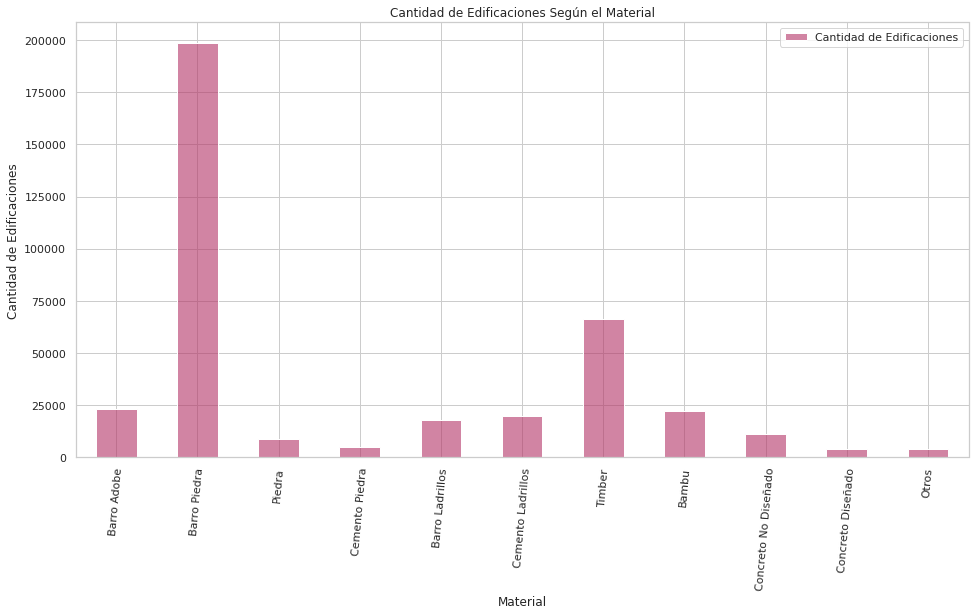

In [ ]:
#@title Gráfico
total_edificaciones_barro_adobe = (int)(features.loc[(features['has_superstructure_adobe_mud'] == 1),\
                                                   ['building_id']].count())

total_edificaciones_barro_piedra = (int)(features.loc[(features['has_superstructure_mud_mortar_stone']\
                                                           == 1),['building_id']].count())

total_edificaciones_piedra = (int)(features.loc[(features['has_superstructure_stone_flag'] == 1),\
                                                   ['building_id']].count())

total_edificaciones_cemento_piedra = (int)(features.loc[(features['has_superstructure_cement_mortar_stone'\
                                                            ] == 1), ['building_id']].count())

total_edificaciones_barro_ladrillos = (int)(features.loc[(features['has_superstructure_mud_mortar_brick'\
                                                                    ] == 1),['building_id']].count())

total_edificaciones_cemento_ladrillos = (int)(features.loc[(features[\
                                        'has_superstructure_cement_mortar_brick'] == 1),['building_id']].count())

total_edificaciones_timber = (int)(features.loc[(features['has_superstructure_timber'] == 1),\
                                                   ['building_id']].count())

total_edificaciones_bambu = (int)(features.loc[(features['has_superstructure_bamboo'] == 1),\
                                                   ['building_id']].count())

total_edificaciones_concreto_no_diseniado = (int)(features.loc[(features[\
                                'has_superstructure_rc_non_engineered'] == 1),['building_id']].count())

total_edificaciones_concreto_diseniado = (int)(features.loc[(features[\
                                        'has_superstructure_rc_engineered'] == 1),['building_id']].count())

total_edificaciones_otro_material = (int)(features.loc[(features['has_superstructure_other'] == 1),\
                                                   ['building_id']].count())


edificaciones_segun_material = pd.DataFrame({
    
    'Material' : ['Barro Adobe', 'Barro Piedra', 'Piedra', 'Cemento Piedra', 'Barro Ladrillos', \
                  'Cemento Ladrillos', 'Timber', 'Bambu', 'Concreto No Diseñado', 'Concreto Diseñado', 'Otros'],
    
        'Cantidad de Edificaciones' : [total_edificaciones_barro_adobe, total_edificaciones_barro_piedra, \
    total_edificaciones_piedra, total_edificaciones_cemento_piedra, total_edificaciones_barro_ladrillos,\
    total_edificaciones_cemento_ladrillos, total_edificaciones_timber, total_edificaciones_bambu, \
                     total_edificaciones_concreto_no_diseniado, total_edificaciones_concreto_diseniado,\
                     total_edificaciones_otro_material]
    
    


}) 

edificaciones_segun_material = edificaciones_segun_material.set_index('Material')

edificaciones_segun_material.plot(kind = 'bar', figsize=(16,8),rot=85,title=\
                                  'Cantidad de Edificaciones Según el Material',color=(0.7, 0.2, 0.4, 0.6) )
ax=plt.gca()
ax.set_ylabel('Cantidad de Edificaciones');
ax.set_xlabel('Material')

Es decir, que la mayoría de las edificaciones consideradas estaban hechas de Barro-Piedra o en menor porcentaje Timber. 

Tener en cuenta, que en esta gráfica, únicamente figuran las construcciones que tengan al correspondiente material como uno de sus componentes. No obstante, hay gran cantidad de edificaciones, que fueron construidas con más de un material. Por este motivo, la cantidad de construcciones que figuran en el gráfico son mayores que las totales (Que habíamos calculado con anterioridad).

Ahora que sabemos el número de edificaciones según el material, examinemos por cada uno de estos, la cantidad de construcciones que sufrieron daños leves, intermedios y severos. 

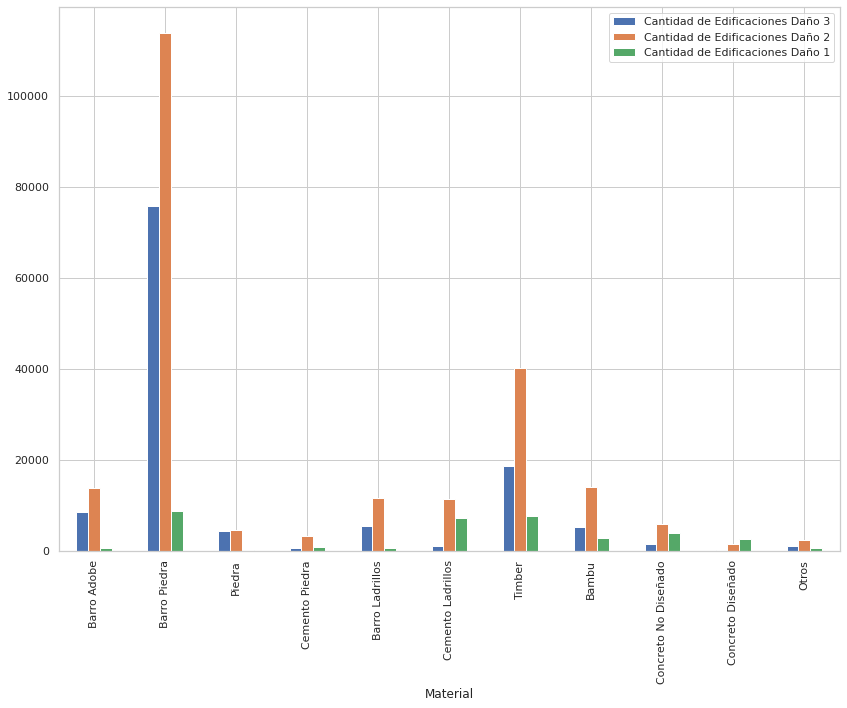

In [ ]:
#@title Gráfico
train_values_con_danio = features.merge(damage_grade, how = "inner")


train_values_con_danio_grado_3 = train_values_con_danio.loc[(train_values_con_danio['damage_grade'] == 3), :]

total_edificaciones_barro_adobe_danio_grado_3 = (int)(train_values_con_danio_grado_3.loc[(\
            train_values_con_danio_grado_3['has_superstructure_adobe_mud'] == 1), ['building_id']].count())

total_edificaciones_barro_piedra_danio_grado_3 = (int)(train_values_con_danio_grado_3.loc[(\
            train_values_con_danio_grado_3['has_superstructure_mud_mortar_stone'] == 1),['building_id']].count())

total_edificaciones_piedra_danio_grado_3 = (int)(train_values_con_danio_grado_3.loc[(\
        train_values_con_danio_grado_3['has_superstructure_stone_flag'] == 1),['building_id']].count())

total_edificaciones_cemento_piedra_danio_grado_3 = (int)(train_values_con_danio_grado_3.loc[(\
        train_values_con_danio_grado_3['has_superstructure_cement_mortar_stone'] == 1),['building_id']].count())

total_edificaciones_barro_ladrillos_danio_grado_3 = (int)(train_values_con_danio_grado_3.loc[(\
            train_values_con_danio_grado_3['has_superstructure_mud_mortar_brick'] == 1),['building_id']].count())

total_edificaciones_cemento_ladrillos_danio_grado_3 = (int)(train_values_con_danio_grado_3.loc[(\
        train_values_con_danio_grado_3['has_superstructure_cement_mortar_brick'] == 1),['building_id']].count())

total_edificaciones_timber_danio_grado_3 = (int)(train_values_con_danio_grado_3.loc[(\
            train_values_con_danio_grado_3['has_superstructure_timber'] == 1),['building_id']].count())

total_edificaciones_bambu_danio_grado_3 = (int)(train_values_con_danio_grado_3.loc[(\
                    train_values_con_danio_grado_3['has_superstructure_bamboo'] == 1),['building_id']].count())

total_edificaciones_concreto_no_diseniado_danio_grado_3 = (int)(train_values_con_danio_grado_3.loc[\
        (train_values_con_danio_grado_3['has_superstructure_rc_non_engineered'] == 1),['building_id']].count())

total_edificaciones_concreto_diseniado_danio_grado_3 = (int)(train_values_con_danio_grado_3.loc[(\
            train_values_con_danio_grado_3['has_superstructure_rc_engineered'] == 1),['building_id']].count())

total_edificaciones_otro_material_danio_grado_3 = (int)(train_values_con_danio_grado_3.loc[(\
                train_values_con_danio_grado_3['has_superstructure_other'] == 1),['building_id']].count())

##################################################################################################################

train_values_con_danio_grado_2 = train_values_con_danio.loc[(train_values_con_danio['damage_grade'] == 2), :]

total_edificaciones_barro_adobe_con_danio_2 = (int)(train_values_con_danio_grado_2.loc[(\
                train_values_con_danio_grado_2['has_superstructure_adobe_mud'] == 1),['building_id']].count())

total_edificaciones_barro_piedra_con_danio_2 = (int)(train_values_con_danio_grado_2.loc[(\
            train_values_con_danio_grado_2['has_superstructure_mud_mortar_stone'] == 1),['building_id']].count())

total_edificaciones_piedra_con_danio_2 = (int)(train_values_con_danio_grado_2.loc[(\
            train_values_con_danio_grado_2['has_superstructure_stone_flag'] == 1),['building_id']].count())

total_edificaciones_cemento_piedra_con_danio_2 = (int)(train_values_con_danio_grado_2.loc[(\
    train_values_con_danio_grado_2['has_superstructure_cement_mortar_stone'] == 1),['building_id']].count())

total_edificaciones_barro_ladrillos_con_danio_2 = (int)(train_values_con_danio_grado_2.loc[(\
        train_values_con_danio_grado_2['has_superstructure_mud_mortar_brick'] == 1),['building_id']].count())

total_edificaciones_cemento_ladrillos_con_danio_2 = (int)(train_values_con_danio_grado_2.loc[(\
        train_values_con_danio_grado_2['has_superstructure_cement_mortar_brick'] == 1),['building_id']].count())

total_edificaciones_timber_con_danio_2 = (int)(train_values_con_danio_grado_2.loc[(\
        train_values_con_danio_grado_2['has_superstructure_timber'] == 1),['building_id']].count())

total_edificaciones_bambu_con_danio_2 = (int)(train_values_con_danio_grado_2.loc[(\
            train_values_con_danio_grado_2['has_superstructure_bamboo'] == 1),['building_id']].count())

total_edificaciones_concreto_no_diseniado_con_danio_2 = (int)(train_values_con_danio_grado_2.loc[(\
        train_values_con_danio_grado_2['has_superstructure_rc_non_engineered'] == 1),['building_id']].count())

total_edificaciones_concreto_diseniado_con_danio_2 = (int)(train_values_con_danio_grado_2.loc[(\
            train_values_con_danio_grado_2['has_superstructure_rc_engineered'] == 1),['building_id']].count())

total_edificaciones_otro_material_con_danio_2 = (int)(train_values_con_danio_grado_2.loc[(\
                train_values_con_danio_grado_2['has_superstructure_other'] == 1),['building_id']].count())


##################################################################################################################

train_values_con_danio_grado_1 = train_values_con_danio.loc[(train_values_con_danio['damage_grade'] == 1), :]

total_edificaciones_barro_adobe_con_danio_1 = (int)(train_values_con_danio_grado_1.loc[(\
                train_values_con_danio_grado_1['has_superstructure_adobe_mud'] == 1),['building_id']].count())

total_edificaciones_barro_piedra_con_danio_1 = (int)(train_values_con_danio_grado_1.loc[(\
        train_values_con_danio_grado_1['has_superstructure_mud_mortar_stone'] == 1),['building_id']].count())

total_edificaciones_piedra_con_danio_1 = (int)(train_values_con_danio_grado_1.loc[(\
        train_values_con_danio_grado_1['has_superstructure_stone_flag'] == 1),['building_id']].count())

total_edificaciones_cemento_piedra_con_danio_1 = (int)(train_values_con_danio_grado_1.loc[(\
        train_values_con_danio_grado_1['has_superstructure_cement_mortar_stone'] == 1),['building_id']].count())

total_edificaciones_barro_ladrillos_con_danio_1 = (int)(train_values_con_danio_grado_1.loc[(\
            train_values_con_danio_grado_1['has_superstructure_mud_mortar_brick'] == 1),['building_id']].count())

total_edificaciones_cemento_ladrillos_con_danio_1 = (int)(train_values_con_danio_grado_1.loc[(\
        train_values_con_danio_grado_1['has_superstructure_cement_mortar_brick'] == 1),['building_id']].count())

total_edificaciones_timber_con_danio_1 = (int)(train_values_con_danio_grado_1.loc[(\
                train_values_con_danio_grado_1['has_superstructure_timber'] == 1),['building_id']].count())

total_edificaciones_bambu_con_danio_1 = (int)(train_values_con_danio_grado_1.loc[(\
            train_values_con_danio_grado_1['has_superstructure_bamboo'] == 1),['building_id']].count())

total_edificaciones_concreto_no_diseniado_con_danio_1 = (int)(train_values_con_danio_grado_1.loc[(\
        train_values_con_danio_grado_1['has_superstructure_rc_non_engineered'] == 1),['building_id']].count())

total_edificaciones_concreto_diseniado_con_danio_1 = (int)(train_values_con_danio_grado_1.loc[(\
        train_values_con_danio_grado_1['has_superstructure_rc_engineered'] == 1),['building_id']].count())

total_edificaciones_otro_material_con_danio_1 = (int)(train_values_con_danio_grado_1.loc[(\
        train_values_con_danio_grado_1['has_superstructure_other'] == 1),['building_id']].count())


##################################################################################################################


edificaciones_segun_material = pd.DataFrame({
    
    'Material' : ['Barro Adobe', 'Barro Piedra', 'Piedra', 'Cemento Piedra', 'Barro Ladrillos', \
                  'Cemento Ladrillos', 'Timber', 'Bambu', 'Concreto No Diseñado', 'Concreto Diseñado', 'Otros'],
    
    'Cantidad de Edificaciones Daño 3' : [total_edificaciones_barro_adobe_danio_grado_3, \
    total_edificaciones_barro_piedra_danio_grado_3,total_edificaciones_piedra_danio_grado_3, \
    total_edificaciones_cemento_piedra_danio_grado_3, total_edificaciones_barro_ladrillos_danio_grado_3,\
    total_edificaciones_cemento_ladrillos_danio_grado_3, total_edificaciones_timber_danio_grado_3,\
    total_edificaciones_bambu_danio_grado_3,total_edificaciones_concreto_no_diseniado_danio_grado_3,\
    total_edificaciones_concreto_diseniado_danio_grado_3,total_edificaciones_otro_material_danio_grado_3],
    
    'Cantidad de Edificaciones Daño 2' : [total_edificaciones_barro_adobe_con_danio_2, \
    total_edificaciones_barro_piedra_con_danio_2,total_edificaciones_piedra_con_danio_2, \
    total_edificaciones_cemento_piedra_con_danio_2, total_edificaciones_barro_ladrillos_con_danio_2,\
    total_edificaciones_cemento_ladrillos_con_danio_2, total_edificaciones_timber_con_danio_2, \
    total_edificaciones_bambu_con_danio_2,total_edificaciones_concreto_no_diseniado_con_danio_2,\
    total_edificaciones_concreto_diseniado_con_danio_2,total_edificaciones_otro_material_con_danio_2],
    
    'Cantidad de Edificaciones Daño 1' : [total_edificaciones_barro_adobe_con_danio_1, \
    total_edificaciones_barro_piedra_con_danio_1,total_edificaciones_piedra_con_danio_1, \
    total_edificaciones_cemento_piedra_con_danio_1, total_edificaciones_barro_ladrillos_con_danio_1,\
    total_edificaciones_cemento_ladrillos_con_danio_1, total_edificaciones_timber_con_danio_1,\
    total_edificaciones_bambu_con_danio_1,total_edificaciones_concreto_no_diseniado_con_danio_1, \
    total_edificaciones_concreto_diseniado_con_danio_1,total_edificaciones_otro_material_con_danio_1]
    
})

edificaciones_segun_material = edificaciones_segun_material.set_index('Material')

graph =  edificaciones_segun_material.plot(kind = 'bar', figsize = (14,10)) 


En conclusión, según los datos brindados por el gráfico, los materiales más débiles, o al menos los que se vieron más afectados por el terremoto fueron Barro-Adobe, Barro-Piedra, Piedra, Barro-Ladrillos, Timber y Bambú. El motivo de esta afirmación, es el hecho de que las construcciones realizadas con estos materiales sufrieron, en porcentaje, daños intermedios o altos, con muy pocos casos de daños bajos. Por otro lado, los materiales más resistentes parecerían ser Cemento-Ladrillos, Concreto No Diseñado y Concreto Diseñado, por la misma razón. 

En retrospectiva, podemos afirmar que nuestra hipótesis inicial fue acertada, debido a que los materiales que uno pensaría como más "rudimentarios" fueron los más endebles, mientras que los más utilizados en construcciones alrededor del mundo fueron los más fuertes. 

# ¿Existe una relación entre el grado de daño de la edificación y el propósito que se le destina a la misma (Hospital, escuela,etc.)?

Otro punto interesante a tener en cuenta es la finalidad que tenía la construcción en cuestión. ¿Hay edificaciones más resistentes a los sismos que otras? ¿Será que los edificios gubernamentales recibieron menores daños que los puestos de salud o las escuelas por ejemplo? ¿Es necesario destinar mayor cantidad de fondos a las estructuras de los establecimientos públicos? Esas son algunas de las preguntas que intentaremos responder.  

En esta pregunta en específico, vamos a considerar únicamente las edificaciones que cuentan con un uso secundario. El porcentaje de las mismas con respecto al total de los datos se muestra en el siguiente gráfico:

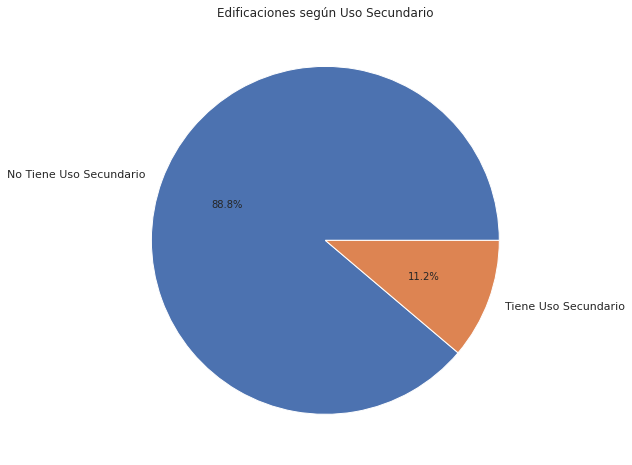

In [ ]:
#@title Gráfico:    
construcciones_por_uso_secundario = features.loc[:,['has_secondary_use']].value_counts().to_frame(\
                                                                            'Tiene Uso Secundario')

titulos = 'No Tiene Uso Secundario', 'Tiene Uso Secundario'
plt.figure(figsize = (8,8))
plt.pie(construcciones_por_uso_secundario['Tiene Uso Secundario'],labels=titulos,autopct='%1.1f%%')
plt.title('Edificaciones según Uso Secundario')
plt.show()

En consecuencia, las construcciones que tendremos en cuenta para nuestro análisis son las que conforman el 11.2% especificado. Pero de estos establecimientos que cuentan con un uso secundario, ¿Cuál es la utilidad que se le brinda a cada uno de ellos? En el siguiente gráfico se muestran los diferentes usos. 

Text(0.5, 0, 'Uso Secundario')

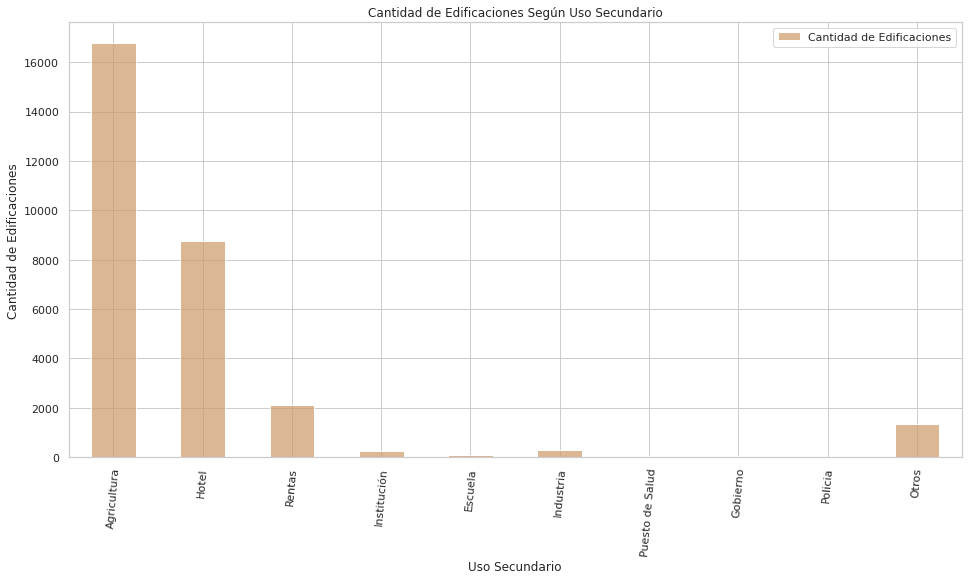

In [ ]:
#@title Gráfico
edificaciones_con_uso_secundario = features.loc[(features['has_secondary_use'] == 1), :]

edificaciones_uso_agricultura =  (int) (edificaciones_con_uso_secundario.loc[( \
            edificaciones_con_uso_secundario['has_secondary_use_agriculture'] == 1),'building_id'].count())

edificaciones_uso_hotel =  (int) (edificaciones_con_uso_secundario.loc[( \
            edificaciones_con_uso_secundario['has_secondary_use_hotel'] == 1),'building_id'].count())

edificaciones_uso_rentas =  (int) (edificaciones_con_uso_secundario.loc[( \
            edificaciones_con_uso_secundario['has_secondary_use_rental'] == 1),'building_id'].count())

edificaciones_uso_institucion =  (int) (edificaciones_con_uso_secundario.loc[( \
            edificaciones_con_uso_secundario['has_secondary_use_institution'] == 1),'building_id'].count())

edificaciones_uso_escuela =  (int) (edificaciones_con_uso_secundario.loc[( \
            edificaciones_con_uso_secundario['has_secondary_use_school'] == 1),'building_id'].count())

edificaciones_uso_industria =  (int) (edificaciones_con_uso_secundario.loc[( \
            edificaciones_con_uso_secundario['has_secondary_use_industry'] == 1),'building_id'].count())

edificaciones_uso_puesto_de_salud =  (int) (edificaciones_con_uso_secundario.loc[( \
            edificaciones_con_uso_secundario['has_secondary_use_health_post'] == 1),'building_id'].count())

edificaciones_uso_gobierno =  (int) (edificaciones_con_uso_secundario.loc[( \
            edificaciones_con_uso_secundario['has_secondary_use_gov_office'] == 1),'building_id'].count())

edificaciones_uso_policia =  (int) (edificaciones_con_uso_secundario.loc[( \
            edificaciones_con_uso_secundario['has_secondary_use_use_police'] == 1),'building_id'].count())

edificaciones_uso_otros =  (int) (edificaciones_con_uso_secundario.loc[( \
            edificaciones_con_uso_secundario['has_secondary_use_other'] == 1),'building_id'].count())

edificaciones_segun_uso_secundario = pd.DataFrame({
    
    'Uso' : ['Agricultura', 'Hotel', 'Rentas', 'Institución', 'Escuela', \
                  'Industria', 'Puesto de Salud', 'Gobierno', 'Policia', 'Otros'],
    
        'Cantidad de Edificaciones' : [edificaciones_uso_agricultura, edificaciones_uso_hotel, \
    edificaciones_uso_rentas, edificaciones_uso_institucion, edificaciones_uso_escuela,\
    edificaciones_uso_industria, edificaciones_uso_puesto_de_salud, edificaciones_uso_gobierno, \
                     edificaciones_uso_policia, edificaciones_uso_otros]

}) 

edificaciones_segun_uso_secundario = edificaciones_segun_uso_secundario.set_index('Uso')

edificaciones_segun_uso_secundario.plot(kind = 'bar', figsize=(16,8),rot=85,\
                        title='Cantidad de Edificaciones Según Uso Secundario',color=(0.8, 0.6, 0.4, 0.7) )
ax=plt.gca()
ax.set_ylabel('Cantidad de Edificaciones');
ax.set_xlabel('Uso Secundario')

Por los datos que nos brinda el gráfico, entonces, podemos concluir que la mayoría de las edificaciones con uso secundario en consideración son destinadas a la agricultura y a la hotelería. 

Nuevamente, como respondimos en la pregunta anterior, examinemos el daño que sufrió cada una de estas construcciones según el uso secundario que se le daba. 

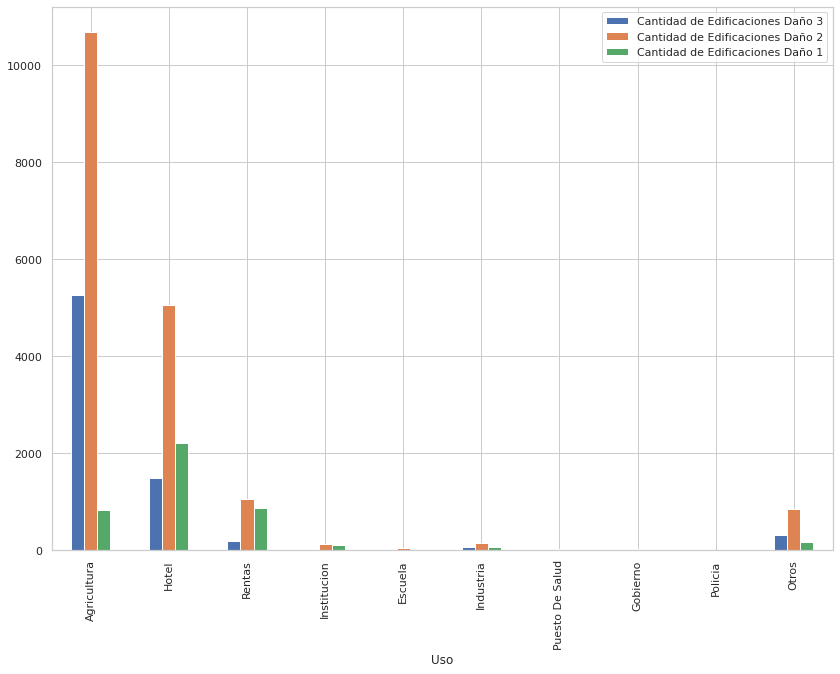

In [ ]:
#@title Gráfico:
total_edificaciones_agricultura_danio_3 = (int)(train_values_con_danio_grado_3.loc[(\
            train_values_con_danio_grado_3['has_secondary_use_agriculture'] == 1),['building_id']].count())

total_edificaciones_hotel_danio_3 = (int)(train_values_con_danio_grado_3.loc[(train_values_con_danio_grado_3[\
                                            'has_secondary_use_hotel'] == 1),['building_id']].count())

total_edificaciones_rentas_danio_3 = (int)(train_values_con_danio_grado_3.loc[(train_values_con_danio_grado_3[\
                                            'has_secondary_use_rental'] == 1),['building_id']].count())

total_edificaciones_institucion_danio_3 = (int)(train_values_con_danio_grado_3.loc[(\
            train_values_con_danio_grado_3['has_secondary_use_institution'] == 1),['building_id']].count())

total_edificaciones_escuela_danio_3 = (int)(train_values_con_danio_grado_3.loc[(train_values_con_danio_grado_3[\
                                    'has_secondary_use_school'] == 1),['building_id']].count())

total_edificaciones_industria_danio_3 = (int)(train_values_con_danio_grado_3.loc[(\
            train_values_con_danio_grado_3['has_secondary_use_industry'] == 1),['building_id']].count())

total_edificaciones_puesto_de_salud_danio_3 = (int)(train_values_con_danio_grado_3.loc[(\
            train_values_con_danio_grado_3['has_secondary_use_health_post'] == 1),['building_id']].count())

total_edificaciones_gobierno_danio_3 = (int)(train_values_con_danio_grado_3.loc[(\
            train_values_con_danio_grado_3['has_secondary_use_gov_office'] == 1),['building_id']].count())

total_edificaciones_policia_danio_3 = (int)(train_values_con_danio_grado_3.loc[(\
                train_values_con_danio_grado_3['has_secondary_use_use_police'] == 1),['building_id']].count())

total_edificaciones_otros_danio_3 = (int)(train_values_con_danio_grado_3.loc[(\
            train_values_con_danio_grado_3['has_secondary_use_other'] == 1),['building_id']].count())

#################################################################################################################

train_values_con_danio_grado_2 = train_values_con_danio.loc[(train_values_con_danio['damage_grade'] == 2), :]

total_edificaciones_agricultura_danio_2 = (int)(train_values_con_danio_grado_2.loc[(\
            train_values_con_danio_grado_2['has_secondary_use_agriculture'] == 1),['building_id']].count())

total_edificaciones_hotel_danio_2 = (int)(train_values_con_danio_grado_2.loc[(train_values_con_danio_grado_2[\
                                    'has_secondary_use_hotel'] == 1),['building_id']].count())

total_edificaciones_rentas_danio_2 = (int)(train_values_con_danio_grado_2.loc[(train_values_con_danio_grado_2[\
                        'has_secondary_use_rental'] == 1),['building_id']].count())

total_edificaciones_institucion_danio_2 = (int)(train_values_con_danio_grado_2.loc[(\
            train_values_con_danio_grado_2['has_secondary_use_institution'] == 1),['building_id']].count())

total_edificaciones_escuela_danio_2 = (int)(train_values_con_danio_grado_2.loc[(train_values_con_danio_grado_2[\
                                            'has_secondary_use_school'] == 1),['building_id']].count())

total_edificaciones_industria_danio_2 = (int)(train_values_con_danio_grado_2.loc[(\
                train_values_con_danio_grado_2['has_secondary_use_industry'] == 1),['building_id']].count())

total_edificaciones_puesto_de_salud_danio_2 = (int)(train_values_con_danio_grado_2.loc[(\
                train_values_con_danio_grado_2['has_secondary_use_health_post'] == 1),['building_id']].count())

total_edificaciones_gobierno_danio_2 = (int)(train_values_con_danio_grado_2.loc[(train_values_con_danio_grado_2[\
                            'has_secondary_use_gov_office'] == 1),['building_id']].count())

total_edificaciones_policia_danio_2 = (int)(train_values_con_danio_grado_2.loc[(train_values_con_danio_grado_2[\
                                'has_secondary_use_use_police'] == 1),['building_id']].count())

total_edificaciones_otros_danio_2 = (int)(train_values_con_danio_grado_2.loc[(train_values_con_danio_grado_2[\
                                'has_secondary_use_other'] == 1),['building_id']].count())

#################################################################################################################

train_values_con_danio_grado_1 = train_values_con_danio.loc[(train_values_con_danio['damage_grade'] == 1), :]

total_edificaciones_agricultura_danio_1 = (int)(train_values_con_danio_grado_1.loc[(\
            train_values_con_danio_grado_1['has_secondary_use_agriculture'] == 1),['building_id']].count())

total_edificaciones_hotel_danio_1 = (int)(train_values_con_danio_grado_1.loc[(train_values_con_danio_grado_1[\
                                'has_secondary_use_hotel'] == 1),['building_id']].count())

total_edificaciones_rentas_danio_1 = (int)(train_values_con_danio_grado_1.loc[(train_values_con_danio_grado_1[\
                                    'has_secondary_use_rental'] == 1),['building_id']].count())

total_edificaciones_institucion_danio_1 = (int)(train_values_con_danio_grado_1.loc[(\
                train_values_con_danio_grado_1['has_secondary_use_institution'] == 1),['building_id']].count())

total_edificaciones_escuela_danio_1 = (int)(train_values_con_danio_grado_1.loc[(train_values_con_danio_grado_1[\
                            'has_secondary_use_school'] == 1),['building_id']].count())

total_edificaciones_industria_danio_1 = (int)(train_values_con_danio_grado_1.loc[(\
                train_values_con_danio_grado_1['has_secondary_use_industry'] == 1),['building_id']].count())

total_edificaciones_puesto_de_salud_danio_1 = (int)(train_values_con_danio_grado_1.loc[(\
                train_values_con_danio_grado_1['has_secondary_use_health_post'] == 1),['building_id']].count())

total_edificaciones_gobierno_danio_1 = (int)(train_values_con_danio_grado_1.loc[(\
                train_values_con_danio_grado_1['has_secondary_use_gov_office'] == 1),['building_id']].count())

total_edificaciones_policia_danio_1 = (int)(train_values_con_danio_grado_1.loc[(train_values_con_danio_grado_1[\
                                    'has_secondary_use_use_police'] == 1),['building_id']].count())

total_edificaciones_otros_danio_1 = (int)(train_values_con_danio_grado_1.loc[(train_values_con_danio_grado_1[\
                            'has_secondary_use_other'] == 1),['building_id']].count())

#################################################################################################################

edificaciones_segun_uso_secundario = pd.DataFrame({
    
    'Uso' : ['Agricultura', 'Hotel', 'Rentas', 'Institucion', 'Escuela', \
                  'Industria', 'Puesto De Salud', 'Gobierno', 'Policia', 'Otros'],
    
        'Cantidad de Edificaciones Daño 3' : [total_edificaciones_agricultura_danio_3, \
        total_edificaciones_hotel_danio_3, total_edificaciones_rentas_danio_3, \
        total_edificaciones_institucion_danio_3, total_edificaciones_escuela_danio_3,\
        total_edificaciones_industria_danio_3, total_edificaciones_puesto_de_salud_danio_3, \
        total_edificaciones_gobierno_danio_3, total_edificaciones_policia_danio_3, \
        total_edificaciones_otros_danio_3],
    
        'Cantidad de Edificaciones Daño 2' : [total_edificaciones_agricultura_danio_2, \
        total_edificaciones_hotel_danio_2, total_edificaciones_rentas_danio_2, \
        total_edificaciones_institucion_danio_2, total_edificaciones_escuela_danio_2,\
        total_edificaciones_industria_danio_2, total_edificaciones_puesto_de_salud_danio_2, \
        total_edificaciones_gobierno_danio_2, total_edificaciones_policia_danio_2, \
        total_edificaciones_otros_danio_2],

        'Cantidad de Edificaciones Daño 1' : [total_edificaciones_agricultura_danio_1, \
        total_edificaciones_hotel_danio_1, total_edificaciones_rentas_danio_1, \
        total_edificaciones_institucion_danio_1, total_edificaciones_escuela_danio_1,\
        total_edificaciones_industria_danio_1, total_edificaciones_puesto_de_salud_danio_1, \
        total_edificaciones_gobierno_danio_1, total_edificaciones_policia_danio_1, \
        total_edificaciones_otros_danio_1],

    


})

edificaciones_segun_uso_secundario = edificaciones_segun_uso_secundario.set_index('Uso')

graph =  edificaciones_segun_uso_secundario.plot(kind = 'bar', figsize = (14,10)) 



Al darle un vistazo al gráfico, podemos identificar rápidamente que el sector de agricultura se vió severamente afectado tras el terremoto ocurrido en Nepal. En menor medida, se puede observar que el área de hotelería también sufrió mucho. 

En pos de identificar mejor los otros usos secundarios, quitamos del gráfico a la agricultura, hotelería, rentas y otros.

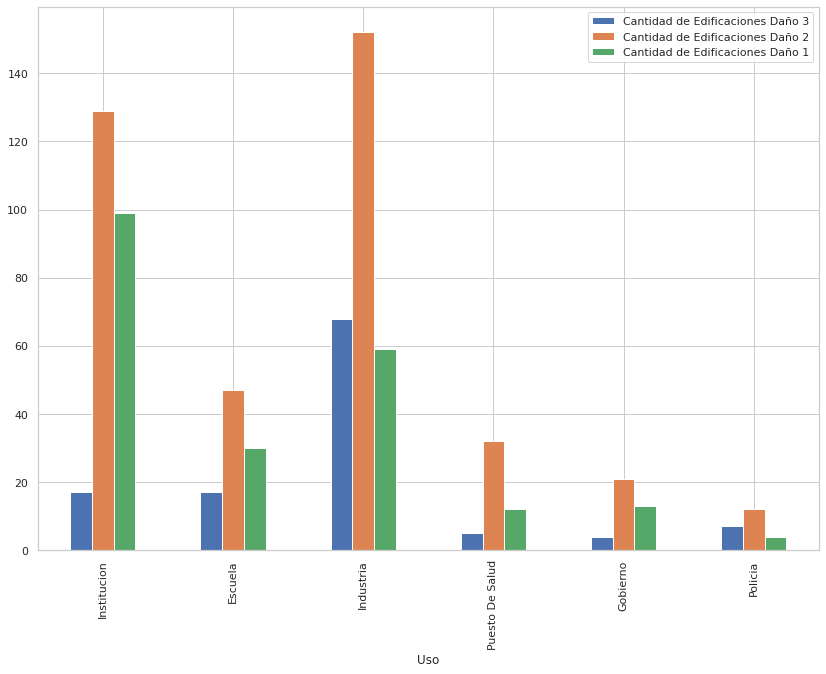

In [ ]:
#@title Gráfico:

edificaciones_segun_uso_secundario = pd.DataFrame({
    
    'Uso' : [ 'Institucion', 'Escuela', \
                  'Industria', 'Puesto De Salud', 'Gobierno', 'Policia'],
    
        'Cantidad de Edificaciones Daño 3' : [ \
     total_edificaciones_institucion_danio_3, total_edificaciones_escuela_danio_3,\
    total_edificaciones_industria_danio_3, total_edificaciones_puesto_de_salud_danio_3, \
    total_edificaciones_gobierno_danio_3, total_edificaciones_policia_danio_3],
    
    'Cantidad de Edificaciones Daño 2' : [ \
     total_edificaciones_institucion_danio_2, total_edificaciones_escuela_danio_2,\
    total_edificaciones_industria_danio_2, total_edificaciones_puesto_de_salud_danio_2, \
        total_edificaciones_gobierno_danio_2, total_edificaciones_policia_danio_2],
    
    'Cantidad de Edificaciones Daño 1' : [ \
     total_edificaciones_institucion_danio_1, total_edificaciones_escuela_danio_1,\
    total_edificaciones_industria_danio_1, total_edificaciones_puesto_de_salud_danio_1, \
        total_edificaciones_gobierno_danio_1, total_edificaciones_policia_danio_1],
    
    


})

edificaciones_segun_uso_secundario = edificaciones_segun_uso_secundario.set_index('Uso')

graph =  edificaciones_segun_uso_secundario.plot(kind = 'bar', figsize = (14,10)) 

Aquí podemos visualizar un poco mejor, como en porcentaje, tanto la industria como la policía también se vieron afectadas negativamente luego del terremoto, en comparación con otros sectores. 

Finalmente, para concluir, entonces sabemos que los rubros más perjudicados fueron: Agricultura, Hotelería, Industria y Policía. Pero aquí nos conviene preguntarnos: ¿Cuáles eran los componentes (Materiales) mayoritarios de las construcciones correspondientes a todos estos sectores?  

Primero, observemos en el siguiente gráfico, los materiales presentes en los rubros de Agricultura y Hotelería. 

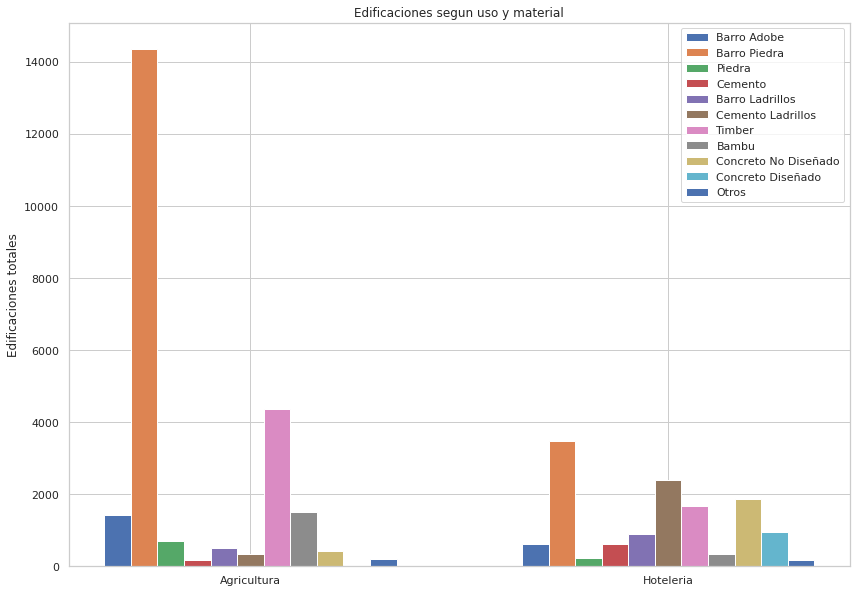

In [ ]:
#@title Gráfico:
train_values_uso_agricultura = train_values_con_danio.loc[(train_values_con_danio['has_secondary_use_agriculture'\
                                                                ] == 1), :]

total_edificaciones_barro_adobe_agricultura = (int)(train_values_uso_agricultura.loc[(\
            train_values_uso_agricultura['has_superstructure_adobe_mud'] == 1),['building_id']].count())

total_edificaciones_barro_piedra_agricultura = (int)(train_values_uso_agricultura.loc[(\
    train_values_uso_agricultura['has_superstructure_mud_mortar_stone'] == 1),['building_id']].count())

total_edificaciones_piedra_agricultura = (int)(train_values_uso_agricultura.loc[(\
            train_values_uso_agricultura['has_superstructure_stone_flag'] == 1),['building_id']].count())

total_edificaciones_cemento_agricultura = (int)(train_values_uso_agricultura.loc[(\
        train_values_uso_agricultura['has_superstructure_cement_mortar_stone'] == 1),['building_id']].count())

total_edificaciones_barro_ladrillos_agricultura = (int)(train_values_uso_agricultura.loc[(\
        train_values_uso_agricultura['has_superstructure_mud_mortar_brick'] == 1),['building_id']].count())

total_edificaciones_cemento_ladrillos_agricultura = (int)(train_values_uso_agricultura.loc[(\
            train_values_uso_agricultura['has_superstructure_cement_mortar_brick'] == 1),['building_id']].count())

total_edificaciones_timber_agricultura = (int)(train_values_uso_agricultura.loc[(\
            train_values_uso_agricultura['has_superstructure_timber'] == 1),['building_id']].count())

total_edificaciones_bambu_agricultura = (int)(train_values_uso_agricultura.loc[(\
            train_values_uso_agricultura['has_superstructure_bamboo'] == 1),['building_id']].count())

total_edificaciones_concreto_no_diseniado_agricultura = (int)(train_values_uso_agricultura.loc[(\
        train_values_uso_agricultura['has_superstructure_rc_non_engineered'] == 1),['building_id']].count())

total_edificaciones_concreto_diseniado_agricultura = (int)(train_values_uso_agricultura.loc[(\
            train_values_uso_agricultura['has_superstructure_rc_engineered'] == 1),['building_id']].count())

total_edificaciones_otro_material_agricultura = (int)(train_values_uso_agricultura.loc[(\
            train_values_uso_agricultura['has_superstructure_other'] == 1),['building_id']].count())

#################################################################################################################

train_values_uso_hoteleria = train_values_con_danio.loc[(train_values_con_danio['has_secondary_use_hotel'] \
                                                    == 1), :]

total_edificaciones_barro_adobe_hoteleria = (int)(train_values_uso_hoteleria.loc[(train_values_uso_hoteleria[\
                            'has_superstructure_adobe_mud'] == 1),['building_id']].count())

total_edificaciones_barro_piedra_hoteleria = (int)(train_values_uso_hoteleria.loc[(\
    train_values_uso_hoteleria['has_superstructure_mud_mortar_stone'] == 1),['building_id']].count())

total_edificaciones_piedra_hoteleria = (int)(train_values_uso_hoteleria.loc[(train_values_uso_hoteleria[\
            'has_superstructure_stone_flag'] == 1), ['building_id']].count())

total_edificaciones_cemento_hoteleria = (int)(train_values_uso_hoteleria.loc[(train_values_uso_hoteleria[\
        'has_superstructure_cement_mortar_stone'] == 1),['building_id']].count())

total_edificaciones_barro_ladrillos_hoteleria = (int)(train_values_uso_hoteleria.loc[(\
        train_values_uso_hoteleria['has_superstructure_mud_mortar_brick'] == 1),['building_id']].count())

total_edificaciones_cemento_ladrillos_hoteleria = (int)(train_values_uso_hoteleria.loc[(\
    train_values_uso_hoteleria['has_superstructure_cement_mortar_brick'] == 1),['building_id']].count())

total_edificaciones_timber_hoteleria = (int)(train_values_uso_hoteleria.loc[(train_values_uso_hoteleria[\
            'has_superstructure_timber'] == 1),['building_id']].count())

total_edificaciones_bambu_hoteleria = (int)(train_values_uso_hoteleria.loc[(train_values_uso_hoteleria[\
                            'has_superstructure_bamboo'] == 1),['building_id']].count())

total_edificaciones_concreto_no_diseniado_hoteleria = (int)(train_values_uso_hoteleria.loc[(\
            train_values_uso_hoteleria['has_superstructure_rc_non_engineered'] == 1),['building_id']].count())

total_edificaciones_concreto_diseniado_hoteleria = (int)(train_values_uso_hoteleria.loc[(\
            train_values_uso_hoteleria['has_superstructure_rc_engineered'] == 1),['building_id']].count())

total_edificaciones_otro_material_hoteleria = (int)(train_values_uso_hoteleria.loc[(\
        train_values_uso_hoteleria['has_superstructure_other'] == 1),['building_id']].count())

###############################################################################################################

train_values_uso_industria = train_values_con_danio.loc[(train_values_con_danio['has_secondary_use_industry'] \
                                                == 1), :]

total_edificaciones_barro_adobe_industria = (int)(train_values_uso_industria.loc[(train_values_uso_industria[\
                                    'has_superstructure_adobe_mud'] == 1), ['building_id']].count())

total_edificaciones_barro_piedra_industria = (int)(train_values_uso_industria.loc[(train_values_uso_industria[\
            'has_superstructure_mud_mortar_stone'] == 1),['building_id']].count())

total_edificaciones_piedra_industria = (int)(train_values_uso_industria.loc[(\
        train_values_uso_industria['has_superstructure_stone_flag'] == 1),['building_id']].count())

total_edificaciones_cemento_industria = (int)(train_values_uso_industria.loc[(train_values_uso_industria[\
                    'has_superstructure_cement_mortar_stone'] == 1),['building_id']].count())

total_edificaciones_barro_ladrillos_industria = (int)(train_values_uso_industria.loc[(\
        train_values_uso_industria['has_superstructure_mud_mortar_brick'] == 1),['building_id']].count())

total_edificaciones_cemento_ladrillos_industria = (int)(train_values_uso_industria.loc[(\
            train_values_uso_industria['has_superstructure_cement_mortar_brick'] == 1),['building_id']].count())

total_edificaciones_timber_industria = (int)(train_values_uso_industria.loc[(train_values_uso_industria[\
                            'has_superstructure_timber'] == 1),['building_id']].count())

total_edificaciones_bambu_industria = (int)(train_values_uso_industria.loc[(train_values_uso_industria[\
                                'has_superstructure_bamboo'] == 1),['building_id']].count())

total_edificaciones_concreto_no_diseniado_industria = (int)(train_values_uso_industria.loc[(\
            train_values_uso_industria['has_superstructure_rc_non_engineered'] == 1),['building_id']].count())

total_edificaciones_concreto_diseniado_industria = (int)(train_values_uso_industria.loc[(\
            train_values_uso_industria['has_superstructure_rc_engineered'] == 1),['building_id']].count())

total_edificaciones_otro_material_industria = (int)(train_values_uso_industria.loc[(train_values_uso_industria[\
                    'has_superstructure_other'] == 1),['building_id']].count())

#################################################################################################################

train_values_uso_policia = train_values_con_danio.loc[(train_values_con_danio['has_secondary_use_use_police'] \
                                                    == 1), :]

total_edificaciones_barro_adobe_policia = (int)(train_values_uso_policia.loc[(train_values_uso_policia[\
                'has_superstructure_adobe_mud'] == 1),['building_id']].count())

total_edificaciones_barro_piedra_policia = (int)(train_values_uso_policia.loc[(train_values_uso_policia[\
                    'has_superstructure_mud_mortar_stone'] == 1),['building_id']].count())

total_edificaciones_piedra_policia = (int)(train_values_uso_policia.loc[(train_values_uso_policia[\
                    'has_superstructure_stone_flag'] == 1),['building_id']].count())

total_edificaciones_cemento_policia = (int)(train_values_uso_policia.loc[(train_values_uso_policia[\
                        'has_superstructure_cement_mortar_stone'] == 1),['building_id']].count())

total_edificaciones_barro_ladrillos_policia = (int)(train_values_uso_policia.loc[(train_values_uso_policia[\
                'has_superstructure_mud_mortar_brick'] == 1),['building_id']].count())

total_edificaciones_cemento_ladrillos_policia = (int)(train_values_uso_policia.loc[(train_values_uso_policia[\
                'has_superstructure_cement_mortar_brick'] == 1),['building_id']].count())

total_edificaciones_timber_policia = (int)(train_values_uso_policia.loc[(train_values_uso_policia[\
                'has_superstructure_timber'] == 1),['building_id']].count())

total_edificaciones_bambu_policia = (int)(train_values_uso_policia.loc[(train_values_uso_policia[\
                        'has_superstructure_bamboo'] == 1),['building_id']].count())

total_edificaciones_concreto_no_diseniado_policia = (int)(train_values_uso_policia.loc[(\
        train_values_uso_policia['has_superstructure_rc_non_engineered'] == 1),['building_id']].count())

total_edificaciones_concreto_diseniado_policia = (int)(train_values_uso_policia.loc[(train_values_uso_policia[\
                'has_superstructure_rc_engineered'] == 1),['building_id']].count())

total_edificaciones_otro_material_policia = (int)(train_values_uso_policia.loc[(train_values_uso_policia[\
                        'has_superstructure_other'] == 1),['building_id']].count())

#################################################################################################################

edificaciones_segun_uso_secundario_y_material = pd.DataFrame({
    
    'Uso' : [ 'Agricultura', 'Hoteleria' ],
    
    'Barro Adobe' : [total_edificaciones_barro_adobe_agricultura, total_edificaciones_barro_adobe_hoteleria\
                      ],
    
    'Barro Piedra' : [total_edificaciones_barro_piedra_agricultura,total_edificaciones_barro_piedra_hoteleria \
                      ],
 
    'Piedra' : [total_edificaciones_piedra_agricultura,total_edificaciones_piedra_hoteleria \
                ],

    'Cemento' : [total_edificaciones_cemento_agricultura,total_edificaciones_cemento_hoteleria \
                 ],

    'Barro Ladrillos' : [total_edificaciones_barro_ladrillos_agricultura,\
                         total_edificaciones_barro_ladrillos_hoteleria\
                         ],
    
    'Cemento Ladrillos' : [total_edificaciones_cemento_ladrillos_agricultura,\
                           total_edificaciones_cemento_ladrillos_hoteleria \
                           ],

    'Timber' : [total_edificaciones_timber_agricultura,total_edificaciones_timber_hoteleria\
               ],

    'Bambu' : [total_edificaciones_bambu_agricultura,total_edificaciones_bambu_hoteleria\
              ],

    'Concreto No Diseñado' : [total_edificaciones_concreto_no_diseniado_agricultura,\
                              total_edificaciones_concreto_no_diseniado_hoteleria\
                              ],

    'Concreto Diseñado' : [total_edificaciones_concreto_diseniado_agricultura, \
                           total_edificaciones_concreto_diseniado_hoteleria \
                           ],
    
    'Otros' : [total_edificaciones_otro_material_agricultura,total_edificaciones_otro_material_hoteleria]
}) 

x = np.arange(len(edificaciones_segun_uso_secundario_y_material))
width = 0.063636363636
 
fig, ax = plt.subplots()
 
rects1 = ax.bar(x - 5*width, \
edificaciones_segun_uso_secundario_y_material['Barro Adobe'],\
                width, label='Barro Adobe')
rects2 = ax.bar(x - 4*width,\
edificaciones_segun_uso_secundario_y_material['Barro Piedra'], width, \
                         label='Barro Piedra')
rects3 = ax.bar(x-3*width,\
edificaciones_segun_uso_secundario_y_material['Piedra'], width, \
                         label='Piedra')
rects4 = ax.bar(x - 2*width,\
edificaciones_segun_uso_secundario_y_material['Cemento'], width, \
                         label='Cemento')
rects5 = ax.bar(x - width,\
edificaciones_segun_uso_secundario_y_material['Barro Ladrillos'], width, \
                         label='Barro Ladrillos')
rects6 = ax.bar(x,\
edificaciones_segun_uso_secundario_y_material['Cemento Ladrillos'], width, \
                         label='Cemento Ladrillos')
rects7 = ax.bar(x + width,\
edificaciones_segun_uso_secundario_y_material['Timber'], width, \
                         label='Timber')
rects8 = ax.bar(x + 2*width,\
edificaciones_segun_uso_secundario_y_material['Bambu'], width, \
                         label='Bambu')
rects9 = ax.bar(x + 3*width,\
edificaciones_segun_uso_secundario_y_material['Concreto No Diseñado'], width, \
                         label='Concreto No Diseñado')
rects10 = ax.bar(x + 4*width,\
edificaciones_segun_uso_secundario_y_material['Concreto Diseñado'], width, \
                         label='Concreto Diseñado')
rects11 = ax.bar(x + 5*width,\
edificaciones_segun_uso_secundario_y_material['Otros'], width, \
                         label='Otros')

 
ax.set_ylabel('Edificaciones totales')
ax.set_title('Edificaciones segun uso y material')
ax.set_xticks(x)
ax.set_xticklabels(edificaciones_segun_uso_secundario_y_material['Uso'])
ax.legend()
 

fig.set_size_inches(14, 10)
plt.show()

Ahora, observemos el caso de los otros dos rubros: Industria y Policia. 

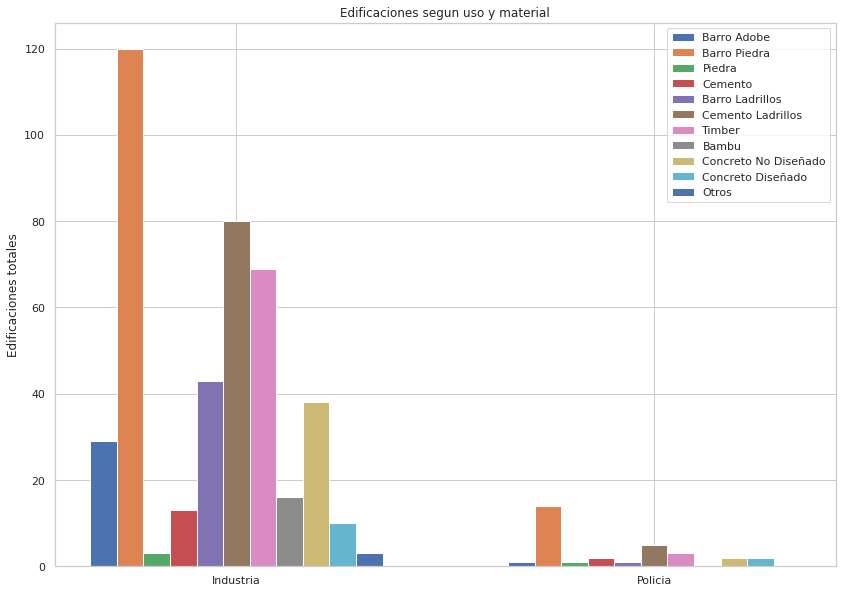

In [ ]:
#@title Gráfico:
edificaciones_segun_uso_secundario_y_material = pd.DataFrame({
    
    'Uso' : [ 'Industria', 'Policia' ],
    
    'Barro Adobe' : [total_edificaciones_barro_adobe_industria, total_edificaciones_barro_adobe_policia\
                      ],
    
    'Barro Piedra' : [total_edificaciones_barro_piedra_industria,total_edificaciones_barro_piedra_policia \
                      ],
 
    'Piedra' : [total_edificaciones_piedra_industria,total_edificaciones_piedra_policia \
                ],

    'Cemento' : [total_edificaciones_cemento_industria,total_edificaciones_cemento_policia \
                 ],

    'Barro Ladrillos' : [total_edificaciones_barro_ladrillos_industria,\
                         total_edificaciones_barro_ladrillos_policia\
                         ],
    
    'Cemento Ladrillos' : [total_edificaciones_cemento_ladrillos_industria,\
                           total_edificaciones_cemento_ladrillos_policia \
                           ],

    'Timber' : [total_edificaciones_timber_industria,total_edificaciones_timber_policia\
               ],

    'Bambu' : [total_edificaciones_bambu_industria,total_edificaciones_bambu_policia\
              ],

    'Concreto No Diseñado' : [total_edificaciones_concreto_no_diseniado_industria,\
                              total_edificaciones_concreto_no_diseniado_policia\
                              ],

    'Concreto Diseñado' : [total_edificaciones_concreto_diseniado_industria, \
                           total_edificaciones_concreto_diseniado_policia \
                           ],
    
    'Otros' : [total_edificaciones_otro_material_industria,total_edificaciones_otro_material_policia]
}) 

x = np.arange(len(edificaciones_segun_uso_secundario_y_material))
width = 0.063636363636
 
fig, ax = plt.subplots()
 
rects1 = ax.bar(x - 5*width, \
edificaciones_segun_uso_secundario_y_material['Barro Adobe'],\
                width, label='Barro Adobe')
rects2 = ax.bar(x - 4*width,\
edificaciones_segun_uso_secundario_y_material['Barro Piedra'], width, \
                         label='Barro Piedra')
rects3 = ax.bar(x-3*width,\
edificaciones_segun_uso_secundario_y_material['Piedra'], width, \
                         label='Piedra')
rects4 = ax.bar(x - 2*width,\
edificaciones_segun_uso_secundario_y_material['Cemento'], width, \
                         label='Cemento')
rects5 = ax.bar(x - width,\
edificaciones_segun_uso_secundario_y_material['Barro Ladrillos'], width, \
                         label='Barro Ladrillos')
rects6 = ax.bar(x,\
edificaciones_segun_uso_secundario_y_material['Cemento Ladrillos'], width, \
                         label='Cemento Ladrillos')
rects7 = ax.bar(x + width,\
edificaciones_segun_uso_secundario_y_material['Timber'], width, \
                         label='Timber')
rects8 = ax.bar(x + 2*width,\
edificaciones_segun_uso_secundario_y_material['Bambu'], width, \
                         label='Bambu')
rects9 = ax.bar(x + 3*width,\
edificaciones_segun_uso_secundario_y_material['Concreto No Diseñado'], width, \
                         label='Concreto No Diseñado')
rects10 = ax.bar(x + 4*width,\
edificaciones_segun_uso_secundario_y_material['Concreto Diseñado'], width, \
                         label='Concreto Diseñado')
rects11 = ax.bar(x + 5*width,\
edificaciones_segun_uso_secundario_y_material['Otros'], width, \
                         label='Otros')

 
ax.set_ylabel('Edificaciones totales')
ax.set_title('Edificaciones segun uso y material')
ax.set_xticks(x)
ax.set_xticklabels(edificaciones_segun_uso_secundario_y_material['Uso'])
ax.legend()
 

fig.set_size_inches(14, 10)
plt.show()

Analizando los gráficos, podemos entender que los cuatro rubros más afectados: Agricultura, Hotelería, Industria y Policia, poseen como componente principal Barro Piedra. Otro material muy recurrente en estos casos fue el Timber. 

Ambos materiales fueron determinados en la pregunta anterior como endebles, por lo que para todas estas construcciones, quizás sea una buena idea, modificar el material de construcción a Concreto, por ejemplo.

En cuanto a la pregunta que planteamos al comienzo de esta sección, creemos que no hubo una diferencia significativa entre los edificios de gobierno y las construcciones públicas (Hospitales o escuelas, por ejemplo).

# ¿Existe una relación entre la altura de los edificios y el grado de daño que recibieron?

In [ ]:
#@title .
#verifico que cantidad de edificios coincide en ambos dataframes
len(damage_grade) == len(features)

#info
damage_grade.info()

features.info()

#ver antiguedad predominante edificios
age = features["age"]
age.value_counts()

#relacion altura - daño
heights = features[["building_id","height_percentage"]]
heights_and_damage = heights.merge(damage_grade,how='inner',right_on='building_id',left_on='building_id')

Agrupo los edificios por altura y así calculo el promedio de daño recibido.

In [ ]:
#@title Tabla:
#edificios agrupados por altura con el daño promedio que sufrieron
sorted_height_and_damage = heights_and_damage.groupby('height_percentage', as_index=False).agg(
    average_damage = pd.NamedAgg(column='damage_grade', aggfunc = pd.Series.mean)
).sort_values("average_damage",ascending=False)
sorted_height_and_damage

,height_percentage,average_damage
26,32,2.99
22,25,2.67
24,28,2.50
23,26,2.50
6,8,2.34
5,7,2.32
4,6,2.30
3,5,2.27
21,24,2.25
2,4,2.22


Observo, las 3 alturas con mas destrucción promedio son 32m, 25m, 28m. Ahora realizo el mismo análisis pero solo para viviendas privadas.

Realizo el mismo análisis pero solo para viviendas privadas.

In [ ]:
#@title Tabla:
#descarto edificios con uso secundario (conservo viviendas)
homes = features[features["has_secondary_use"] == 0]

home_heights = homes[["building_id","height_percentage"]]
homes_heights_and_damage = home_heights.merge(damage_grade,how='inner',right_on='building_id',left_on='building_id')

sorted_homes_height_and_damage = homes_heights_and_damage.groupby('height_percentage', as_index=False).agg(
    average_damage = pd.NamedAgg(column='damage_grade', aggfunc = pd.Series.mean)
).sort_values("average_damage",ascending=False)
sorted_homes_height_and_damage

,height_percentage,average_damage
23,28,3.00
22,26,3.00
20,24,3.00
24,32,2.96
18,21,2.50
21,25,2.50
6,8,2.36
5,7,2.34
4,6,2.32
3,5,2.28


Observo, las primeras 6 alturas tienen destrucción promedio mayor a 2.5.

Comparo los daños promedio de las casas con el de los edificios en general.
*3 siendo el mayor daño posible, considero edificio con daño recibido mayor a 2.5 como inhabitable*

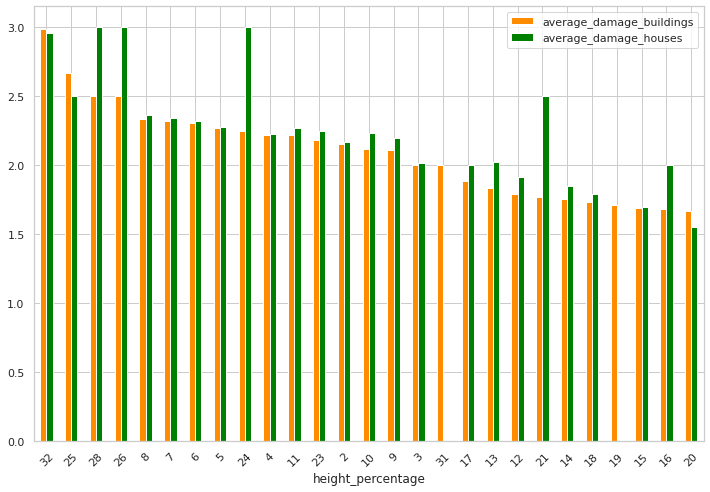

In [ ]:
#@title Gráfico:
sorted_height_and_damage.merge(sorted_homes_height_and_damage,how='outer',left_on="height_percentage",right_on="height_percentage")\
                        .rename(columns={'average_damage_x': 'average_damage_buildings', 'average_damage_y': 'average_damage_houses'})\
                        .plot(x="height_percentage", y=["average_damage_buildings","average_damage_houses"], kind="bar", rot=45,\
                                                              figsize=(12,8), color={"average_damage_buildings": "DarkOrange", "average_damage_houses": "green"})

Concluyo que en general, las viviendas sufrieron un daño mayor o igual al edificio promedio.

In [ ]:
#@title .
#averiguo max y min height
maxHeight = sorted_homes_height_and_damage["height_percentage"].max()
minHeight = sorted_homes_height_and_damage["height_percentage"].min()
print(maxHeight, minHeight)

Dadas las alturas mínima 2 y máxima 32, las 6 alturas con daño mayor a 2.5 en viviendas (28,26,24,32,21,25)m se encuentran mucho mas cercanas a la máxima que a la mínima, por lo que podrían considerarse como edificios altos y plantear la siguiente hipótesis.

Hipótesis: Teniendo en cuenta el análisis previo, las viviendas que mas daño sufrieron, tienen la capacidad de hospedar a una mayor cantidad de familias, podría ser entonces que en los edificios que sufrieron mayor daño se haya encontrado una mayor cantidad de familias que en el edificio promedio. Esto podría concluir en que solo teniendo la información de la cantidad de edificios destruídos no es suficiente para estimar la cantidad de familias que perdieron la posibilidad de habitar en su vivienda.

Pasos a seguir: primero verifico que haya edificios con mas  de 1 familia viviendo, luego obtengo el promedio de familias por edificio, luego obtengo el promedio de cantidad de familias en los edificios de las 6 alturas que sufrieron mayor daño promedio y los comparo.

Verifico cuenta de cantidad de familias en los edificios

In [ ]:
#@title .
#cantidad de edificios con cada cantidad de familias
features["count_families"].value_counts()

1    226115
0     20862
2     11294
3      1802
4       389
5       104
6        22
7         7
9         4
8         2
Name: count_families, dtype: int64

Tomo el promedio de familias por edificio general desde el dataframe de features

In [ ]:
#@title .
promedio_familias_por_edificio = features["count_families"].mean()
print(round(promedio_familias_por_edificio,2))

0.98


Alturas de viviendas con daños promedios >= 2.5

In [ ]:
#@title Tabla:
most_damaged_heights = sorted_homes_height_and_damage[sorted_homes_height_and_damage["average_damage"]>=2.5]
most_damaged_heights

,height_percentage,average_damage
23,28,3.00
22,26,3.00
20,24,3.00
24,32,2.96
18,21,2.50
21,25,2.50


Filtro el dataframe con las 6 alturas obtenidas y solo me quedo con las viviendas, de ahi consigo el promedio de familias por vivienda

In [ ]:
#@title .
#conservo edificios con altura incluida en las mas dañadas
most_damaged_homes = homes.merge(most_damaged_heights,how='inner',right_on='height_percentage',left_on='height_percentage')
promedio_familias_edificios_mas_altos = most_damaged_homes["count_families"].mean()

Comparación de los promedios

In [ ]:
#@title .
print(" Promedio de familias por edificio gral:",round(promedio_familias_por_edificio,2), "\n", "Promedio de familias por vivienda: ", round(promedio_familias_edificios_mas_altos,2))

 Promedio de familias por edificio gral: 0.98 
 Promedio de familias por vivienda:  0.97


La hipótesis no se cumple tomando como muestra las 6 alturas que sufrieron mayor daño promedio, pero aún si se cumpliera, la diferencia de cantidad de familias viviendo en un edificio promedio contra la cantidad viviendo en los edificios de altura que recibieron mayor daño es ínfima, por lo que la hipótesis queda descartada.

# ¿Cómo se distribuye el grado de daño según categoría en las distintas variables categóricas?

Reiteramos la distribución del grado de daño porque haremos varias referencias a la misma en esta sección:

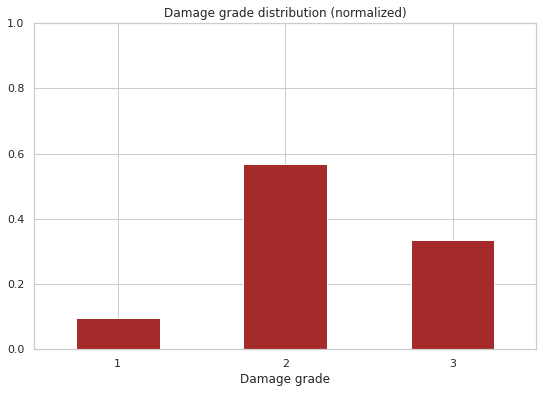

In [ ]:
#@title Gráfico:
damage_grade_count = damage_grade['damage_grade'].value_counts().reset_index().sort_values('index')
damage_grade_count.columns = ['damage_grade','count']
damage_grade_count.set_index('damage_grade', inplace=True)
g1 = (damage_grade_count / len(damage_grade))['count'].plot(kind='bar',color='brown',figsize=(9,6),rot=0)
g1.set_xlabel(' '.join(g1.get_xlabel().split('_')).capitalize())
g1.set_ylim(0,1)
g1.set_title('Damage grade distribution (normalized)')
plt.show()

Con esta distribución vamos a comparar a las distribuciones por categoría para cada variable categórica con tal de hacernos una idea del efecto que estas tienen sobre la misma:

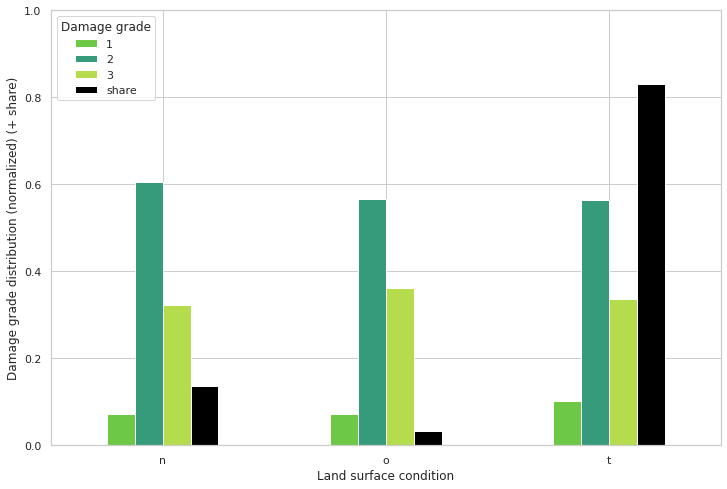

In [ ]:
#@title Gráfico:
categories = features.select_dtypes(include='category').columns
merged_categories = features.loc[:,['building_id'] + list(categories)].merge(damage_grade)
pivot_by_category = [
    merged_categories.pivot_table(index=category,columns='damage_grade',values='building_id',aggfunc='count')
    for category in categories
]
for category in pivot_by_category:
    category['share'] = category.T.sum()
    for column in category.columns[:-1]:
        category[column] = category[column] / category['share']
    category['share'] = category['share'] / category['share'].sum()


colors = [
    ['#6cc845','#369b7a','#b4dc4c','#000000'],
    ['#ffa758','#ffc958','#ff5d58','#000000'],
    ['#5a9d0d','#097157','#adab0e','#000000'],
    ['#7d2ea8','#cf3181','#4f39ae','#000000'],
    ['#5567c7','#7952c6','#469cbd','#000000'],
    ['#ca5195','#fc6565','#8649a8','#000000'],
    ['#aa9e39','#aa3c39','#256e5d','#000000'],
    ['#2856ab','#562ab0','#1aae76','#000000']
]
def plot_category(category,i):
    g = category.plot(kind='bar',figsize=(12,8),color=colors[i],rot=0)
    g.set_ylabel('Damage grade distribution (normalized) (+ share)')
    g.set_xlabel(' '.join(g.get_xlabel().split('_')).capitalize())
    g.legend(title='Damage grade')
    g.set_ylim(0, 1)

plot_category(pivot_by_category[0],0)

La diferencia entre las distribuciones de los niveles de daño según las condiciones del suelo en que fue construido es mínima, lo cual nos lleva a creer que ninguna de las condiciones (n,o,t) tiene algún efecto en el nivel de daño.

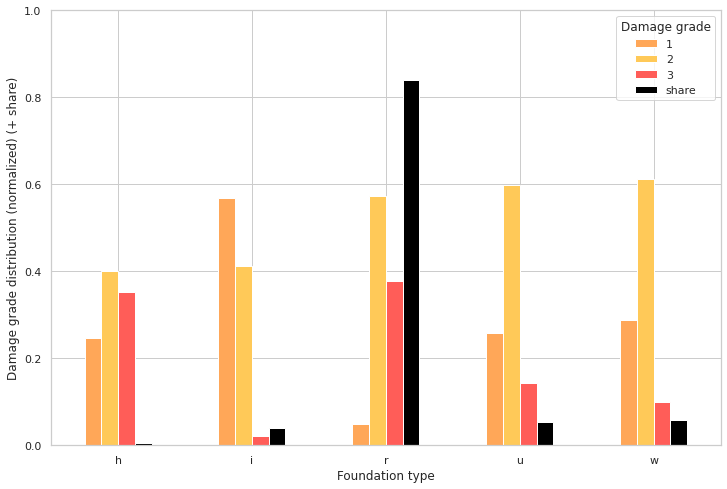

In [ ]:
#@title Gráfico:
plot_category(pivot_by_category[1],1)

En el caso del fundamento de la edificación podemos ver que el tipo 'r' parece ser el más propenso a daño, dado que aproximadamente el 5% de los edificios con este tipo de fundamento resistió el terremoto con daños leves, lo cual es preocupante teniendo en cuenta que la gran mayoría de los edificios usan este tipo de fundamento, creemos que la razon porque se usa tanto es porque es el tipo de fundamento más barato.

Seguido del tipo 'h', del cual solo el 25% de los edificios con este tipo de fundamento resistió el terremoto, aunque la cantidad de edificios con este tipo de fundamento es muy baja como para confiar en estos resultados.

Al tipo 'h' le siguen los tipos 'u' y 'w' con una cantidad de daño media tendiendo a baja.

Por ultimo el mejor tipo de fundamento debe ser el tipo 'i', con la mayor proporción de edificios que resistieron el terremoto con leve daño y apenas el 2% de estos fue completamente destruido.

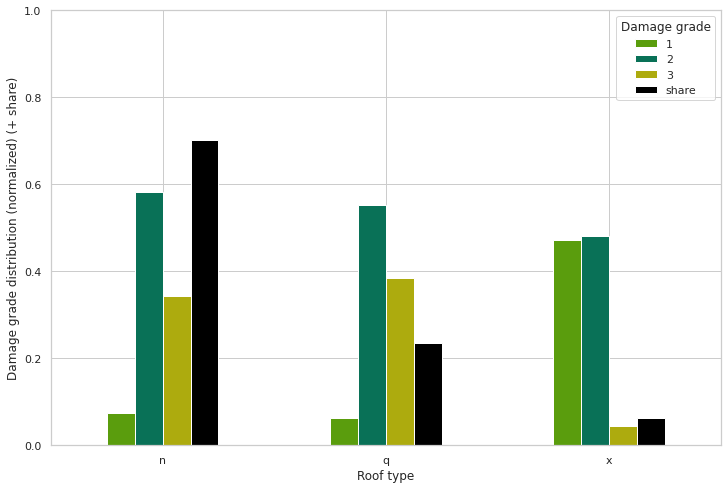

In [ ]:
#@title Gráfico:
plot_category(pivot_by_category[2],2)

No parece haber una diferencia significativa entre los tipos de tejado 'n' y 'q', por otro lado los edificios con el tipo 'x' parecen ser los menos propensos a daños graves.

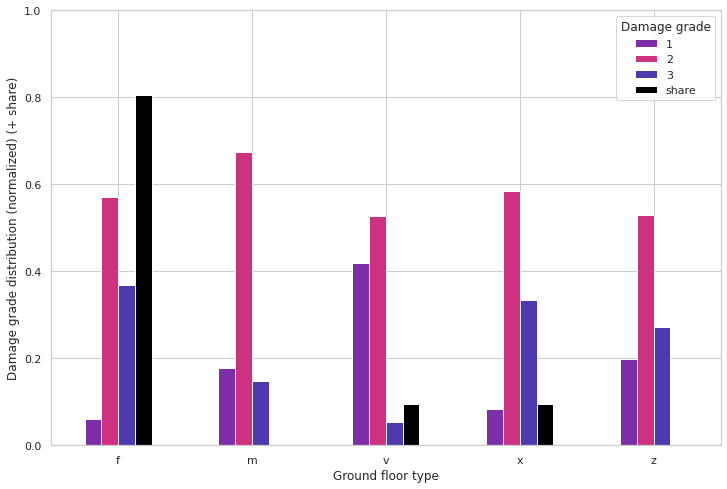

In [ ]:
#@title Gráfico:
plot_category(pivot_by_category[3],3)

En cuanto a el tipo de planta baja, los tipos 'f' y 'x' son muy similiares en el nivel de daño producido por el terremoto en los edificios que los utilizan, con la mayoría de los mismos destruidos completamente o con un nivel de daño medio.

El tipo que mejor soportó el terremoto es el tipo 'v', con un 40% de edificios con daños leves y solo el 6% de ellos fue completamente o casi completamente destruido, aunque solo se utiliza en el 10% de las edificaciones.

Y los tipos 'm' y 'z' generalmente no son utilizados pero tampoco muestran muy buenos resultados.

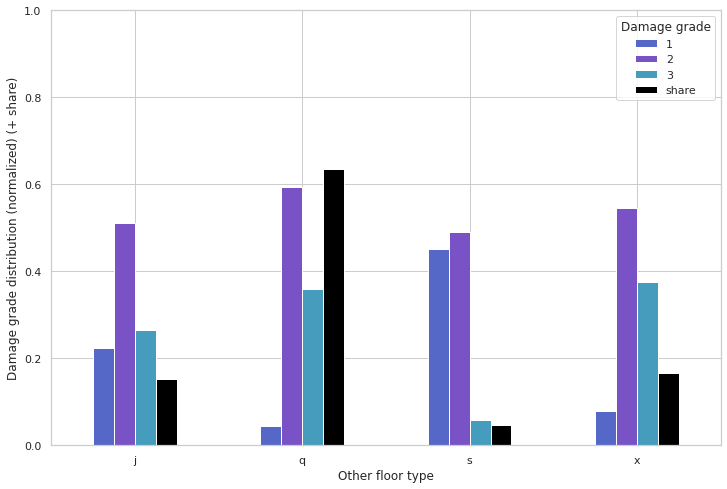

In [ ]:
#@title Gráfico:
plot_category(pivot_by_category[4],4)

El único tipo de construcción usado en otros pisos que parece tener un efecto positivo en el grado de daño producido por el terremoto en el edificio es el tipo 's', con el 45% de estos sobreviviendo al terremoto con un nivel de daño leve y apenas el 6% fue casi completamente destruido.

Cabe notar que de los edificios que usaron el tipo 'j', más del 20% se llevó daños leves, una mejor respuesta  que la que tuvieron los que usaron los tipos 'q' y 'x'.

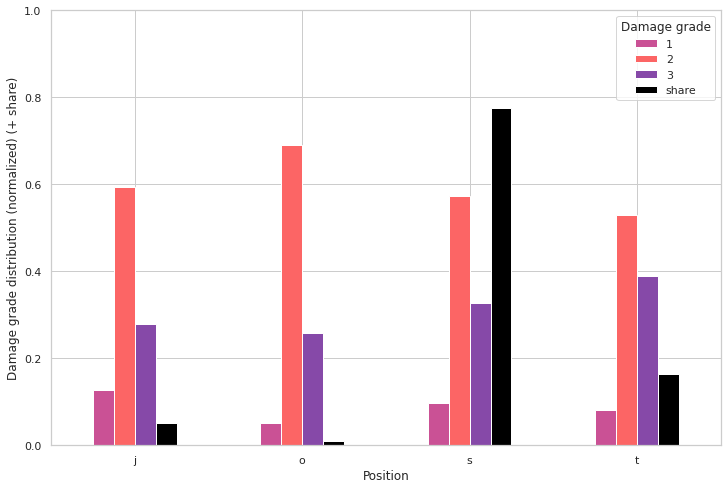

In [ ]:
#@title Gráfico:
plot_category(pivot_by_category[5],5)

La posicion del edificio (j,o,s,t) no juega un papel importante en el grado de destruccion del mismo.

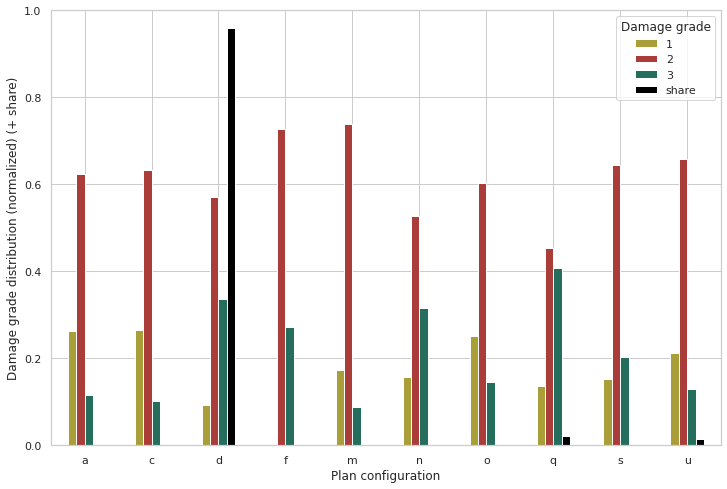

In [ ]:
#@title Gráfico:
plot_category(pivot_by_category[6],6)

La configuración más utilizada es la de tipo 'd' (podría ser la asociada a una base rectangular, dado que es la más común).

De las demás solo una es notable por su alto grado de daño, y es la de tipo 'q' con la mayor proporción de edificios casi totalmente destruidos (debe tratarse de una base compleja con más esquinas o curvas, lo que la haría más propensa a estrés por torsión en caso de terremoto). También hay que tener en cuenta que el tamaño de la muestra es muy pequeño como para determinar con certeza que este tipo de configuración es propenso a daños, lo cual podría deberse a otros factores.

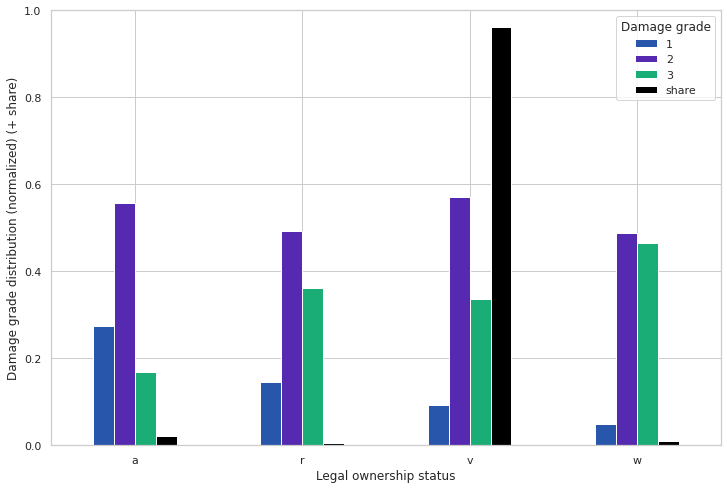

In [ ]:
#@title Gráfico:
plot_category(pivot_by_category[7],7)

Más del 95% de los edificios tienen un estado de propiedad legal 'v', lo cual no parece tener relación con el grado de daño. Más aún, si bien de los edificios con estado de propiedad legal 'w' el 45% fue casi totalmente destruido, si nos fijamos en cual es la proporción de edificios con ese estado de propiedad legal vemos que esa correlación podría deberse a que el tamaño de la muestra no es lo suficientemente grande.

#¿Cómo es la relación de los años que tienen las edificaciones con el grado de daño que tuvieron?

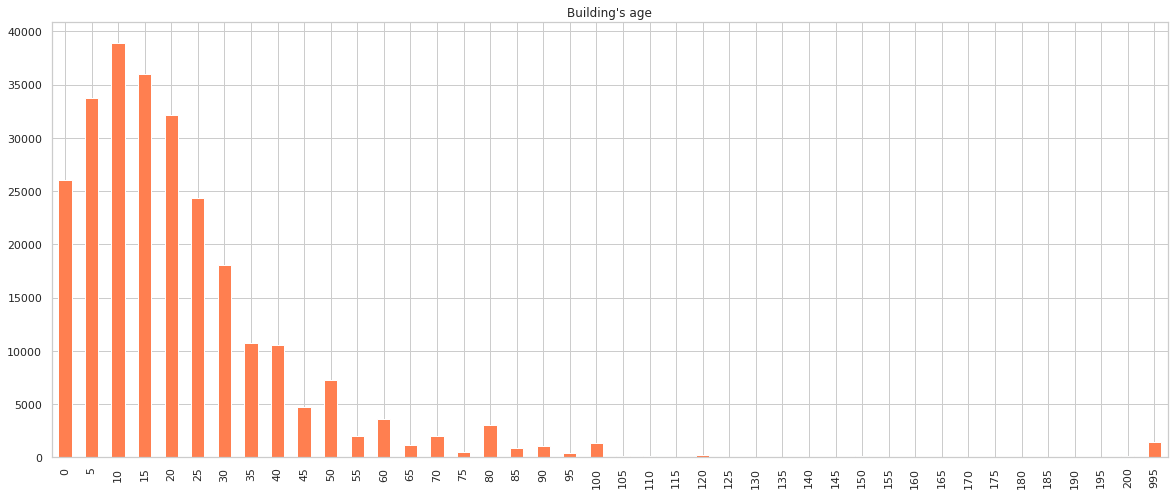

In [ ]:
#@title Primero queremos ver cómo se distribuyen los años de las edificaciones.
earthquake = features[['building_id', 
                           'age', 'plan_configuration']].merge(damage_grade, how='inner').drop(columns=['building_id'])
earthquake['age'].value_counts().sort_index().plot(kind='bar', figsize=(20,8), title="Building's age", color='coral')

Se puede observar que hay una gran mayoría de edificaciones que tienen entre 0 y 20 años, también se ve que hay varias edificaciones que tienen 995 años.

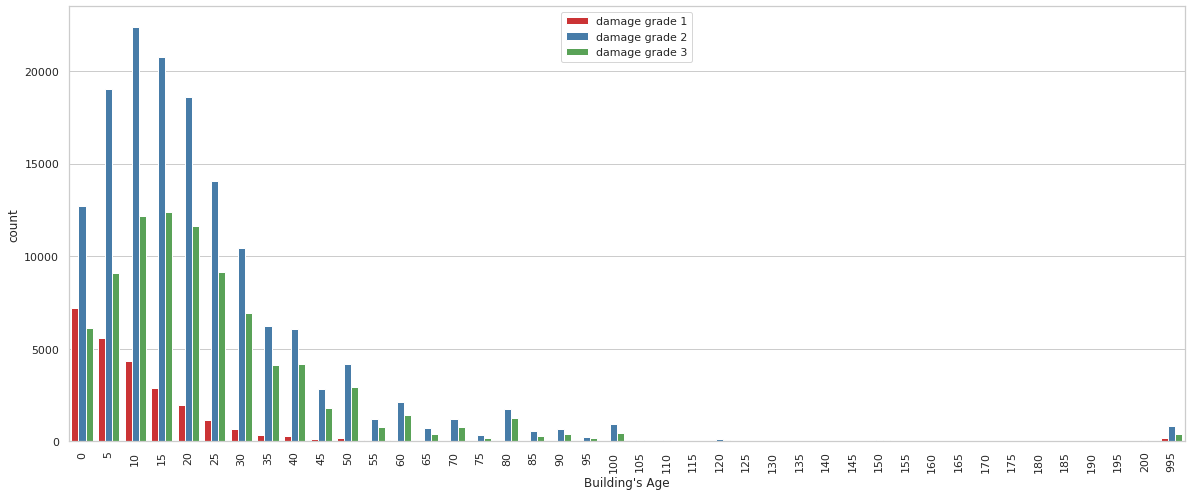

In [ ]:
#@title  Ahora podemos relacionar la cantidad de años con el grado de daño sufrido.
plt.figure(figsize=(20,8))
sns.countplot(x=earthquake["age"],hue=earthquake["damage_grade"], palette='Set1')
plt.xlabel("Building's Age")
plt.xticks(rotation=90)
plt.legend(["damage grade 1","damage grade 2","damage grade 3"])
plt.show()

Si bien la distribución de años es muy parecida a la anterior, se observa cómo se distribuyen los años con su grado de daño, notamos que en una gran mayoría de las edificaciones sufrieron daños de grado medio.

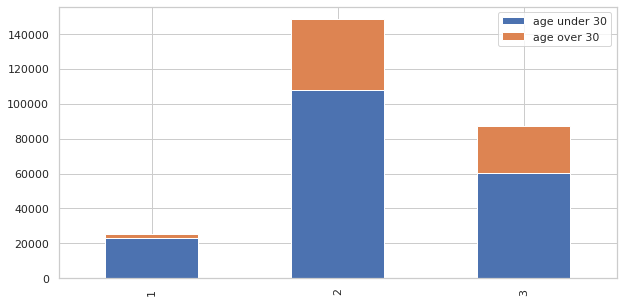

In [ ]:
#@title Queremos averiguar si la relación del grado de daño que tienen las edificaciones, tiene alguna conexión con los años que tienen, separando los años de las edificaciones, si son mayores o menores de 30 años.

ageUnder30 = earthquake[earthquake['age'] < 30].groupby('damage_grade')['age'].agg('count')
ageOver30 = earthquake[earthquake['age'] >= 30].groupby('damage_grade')['age'].agg('count')

df = pd.DataFrame({'ageUnder30': ageUnder30,
                   'ageOver30': ageOver30}, index=[1,2,3])

damageByAge = df.plot.bar(stacked=True, figsize = (10,5))
damageByAge.legend(["age under 30","age over 30"])


Se ve claramente que las edificaciones con grado medio de daño fueron mucho más que las de los otros grados, otra observación es que de las edificaciones viejas (mayores a 30 años), una gran proporción también sufrió un daño medio, lo mismo se puede decir de las edificaciones más nuevas.

**¿Afectó el formato de construcción de la edificación?**

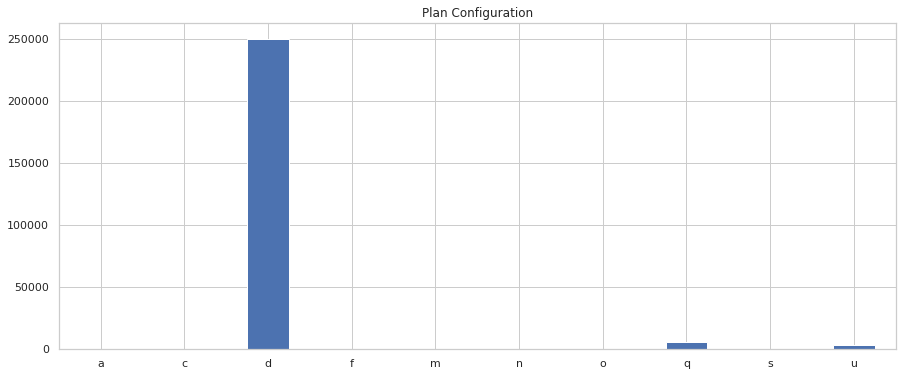

In [ ]:
#@title Se quiere ver si el plan de construcción usado puede tener algún tipo de relación con los años que tienen las edificaciones.

earthquake['plan_configuration'].value_counts().sort_index().plot(kind='bar', figsize=(15,6), rot=0 ,title="Plan Configuration")

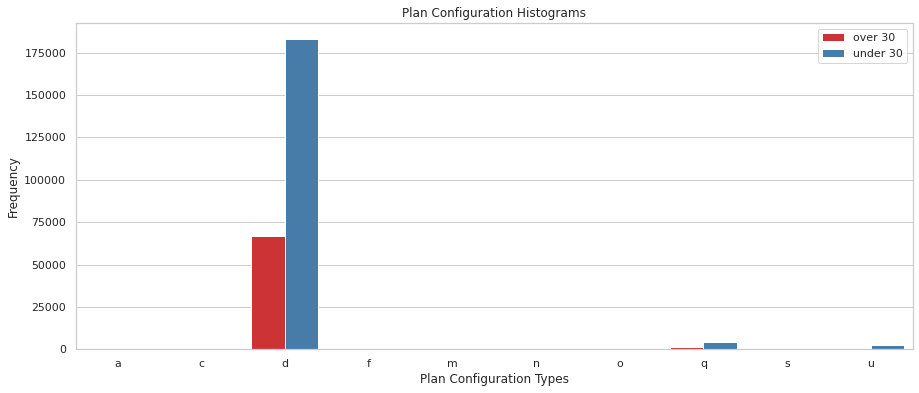

In [ ]:
#@title Se ve que el más utilizado fue el plan ‘d’, ahora queremos saber si tiene algun tipo de relación con los años de la edificación.

plt.figure(figsize=(15,6))
sns.countplot(x=earthquake["plan_configuration"],hue=(earthquake["age"]<30), palette = 'Set1')
plt.ylabel("Frequency")
plt.xlabel("Plan Configuration Types")
plt.title("Plan Configuration Histograms")
plt.legend(["over 30","under 30"])
plt.show()


Como se puede observar, el formato de construcción utilizado, se podría decir que fue el mismo para las edificaciones nuevas y viejas. Concluyendo que no hay ningún tipo de relación, que el formato elegido es independiente de los años de las edificaciones.

# Repositorio de Github: https://github.com/fedepenic/Trabajo-Practico-1-Organizacion-De-Datos.git